Тема урока: регулярные выражения
Соответствие одному из нескольких символов
Использование диапазона набора символов
Соответствие с чем угодно, кроме
Соответствие одному из нескольких регулярных выражений

Соответствие одному из нескольких символов

Как мы уже знаем, точке . соответствует один произвольный символ, однако на практике часто требуется искать конкретные символы. В регулярных выражениях набор символов определяется с помощью метасимволов [ и ]. Метасимволы [ и ] определяют набор допустимых символов.

Регулярному выражению:

[ns]a.\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

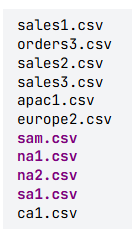

In [1]:
from functions import picture
picture('Без имепарни.png')

Используемое здесь регулярное выражение начинается с [ns], которое соответствует либо символу n, либо символу s. Символы [ и ] не соответствуют никаким символам, они определяют набор. Символ a соответствует a, точке . соответствует любой символ, наклонной черте с точкой \. соответствует символ ., а последовательности символов csv соответствует csv.

Наборы символов часто используются для выполнения поиска, не зависящего от регистра.

Регулярному выражению:

[Rr]eg[Ee]x

в тексте:

The phrase "regular expression" is often abbreviated as RegEx or regex.

соответствует (выделено жирным шрифтом):

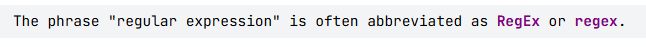

In [2]:
picture('Бездпав имени.png')

Используемое здесь регулярное выражение содержит два набора символов: [Rr], которому соответствуют символы R и r, и [Ee], которому соответствуют символы E и e. Именно поэтому мы нашли как RegEx, так и regex. Однако, например, последовательность символов REGEX не была бы найдена.

Использование диапазона набора символов

Как уже было показано выше, регулярному выражению:

[ns]a.\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

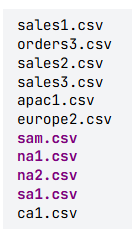

In [3]:
from functions import picture
picture('Без имепарни.png')

Файл sam.csv был найден, потому что точке . соответствуют все символы, а не только цифры. Что если нам нужно избавиться от файла sam.csv, оставив только файлы na1.csv, na2.csv и sa1.csv? Наборы символов могут решить эту проблему.

Регулярному выражению:

[ns]a[0123456789]\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

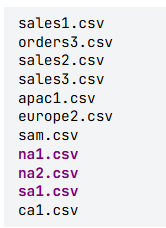

In [4]:
picture('Без сгимени.png')

В этом примере регулярное выражение было изменено так, чтобы первый символ был либо n, либо s, второй символ – только a, третьим символом могла быть любая цифра. При этом файл sam.csv не был найден, так как m не соответствует списку допустимых символов.

При работе с регулярными выражениями часто приходится определять диапазоны символов (от 0 до 9, от A до Z и т.д.). Чтобы упростить работу с символьными диапазонами, в регулярных выражениях для определения диапазонов используется специальный метасимвол: дефис -.

Символ дефис - рассматривается как специальный метасимвол только тогда, когда он используется в диапазоне, то есть между [ и ]. Вне диапазона символ - является обычным символом и соответствует только самому себе. Поэтому вне диапазона символу - не должен предшествовать никакой специальный символ.

Регулярному выражению:

[ns]a[0-9]\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

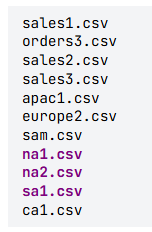

In [5]:
picture('Без имxgени.png')

Регулярное выражение [0-9] функционально эквивалентно выражению [0123456789].

Диапазоны могут состоять не только из цифр. Приведем примеры правильных (допустимых) диапазонов:

[A-Z] соответствует всем символам латинского алфавита верхнего регистра от A до Z
[a-z] соответствует всем символам латинского алфавита нижнего регистра от a до z
[A-F] соответствует всем символам латинского алфавита верхнего регистра от A до F
[А-Я] соответствует всем символам русского алфавита верхнего регистра от А до Я
[а-ф] соответствует всем символам русского алфавита нижнего регистра от а до ф

Любые два символа ASCII (UTF-8) могут быть определены как начало и конец диапазона. Однако обычно диапазоны составляются из некоторых (или всех) цифр и некоторых (или всех) алфавитных символов.

При использовании диапазонов нужно следить, чтобы конец диапазона не был меньше, чем его начало. К примеру, диапазоны [4-1] или [z-a] недопустимы.

Мы также можем объединить несколько диапазонов в один.

Регулярные выражения:

[A-Za-z0-9]
[12a-p34]

являются сокращением для:

[ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789]
[12abcdefghijklmnop34]

Соответствие с чем угодно, кроме

Наборы символов обычно используются для того, чтобы определить список символов, любой из которых может соответствовать одному символу. Но иногда проще указать список символов, ни с одним из которых не должен совпадать данный символ. Другими словами, нужно указать соответствие с чем угодно, кроме того, что указано в наборе символов.

Вместо того, чтобы перечислять каждый символ, можно инвертировать наборы символов, используя метасимвол ^.

Регулярному выражению:

[ns]a[^0-9]\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

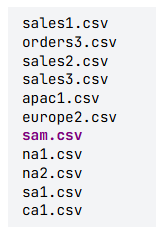

In [6]:
picture('Без имщавени.png')

Диапазон [0-9] соответствует всем цифрам (и только цифрам). Выражение [^0-9] соответствует чему угодно, кроме цифр указанного диапазона. Именно поэтому приведенное регулярное выражение нашло sam.csv, но не нашло na1.csv, na2.csv и sa1.csv.

Метасимвол ^ отрицает все символы или диапазоны в наборе, а не только символ или диапазон, которому он предшествует.

Соответствие одному из нескольких регулярных выражений

Символ вертикальной черты | выполняет роль логического оператора ИЛИ в регулярных выражениях и служит для задания набора альтернатив. Мы можем использовать его всегда, когда хотим найти соответствие одному из нескольких альтернативных выражений.

Регулярному выражению:

sales[0-9]|[ns]a[0-9]\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
sam.csv
na1.csv
na2.csv
sa1.csv
ca1.csv

соответствует (выделено жирным шрифтом):

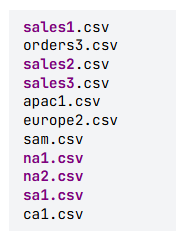

In [7]:
picture('Без имеghioljhни.png')

Если требуется поиск соответствий самому символу |, то в регулярном выражении ему должен предшествовать символ обратной косой черты \|.

Примечания

Примечание 1. Если требуется найти соответствие с символом - внутри диапазона, то лучше всего его указать в самом конце.

Регулярное выражение:

[1-9a-g-]

равнозначно выражению:

[123456789abcdefg-]

Аналогичные правила применяются к символу ^.

Примечание 2. Буква ё не входит в диапазон [a-я], а буква Ё — в диапазон [A-Я].

Примечание 3. Таблица соответствия некоторых метасимволов и диапазонов:

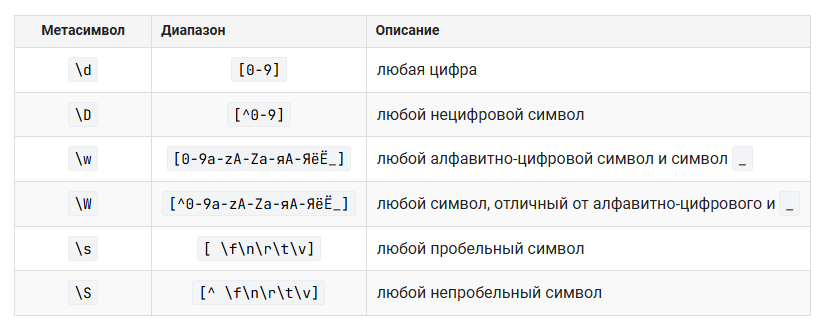

In [8]:
picture('Без ивапдмени.png')

Примечание 4. Обратите внимание на то, что в пределах квадратных скобок перед символом . можно не ставить символ обратной косой черты. Регулярному выражению [0-5.] будут соответствовать цифры от 0 до 5 и точка.

In [24]:
import re
s = 'The male name Timur is Mongolian in origin. Timyr is incredibly popular in our vast country today, but what is most important is that it also has good significance and strong energy. And the name timyr is also compatible with many female Russian modern names.'
pattern = r'[Tt]im[yu]r'
re.findall(pattern, s)

['Timur', 'Timyr', 'timyr']

In [25]:
import re
s = 'I have these files: caaat.png, acab.txt, cat.jpeg, tca-ca.txt, na1.csv, ca2.csv'
pattern = r'ca[a-e]|ca[1-5]'
re.findall(pattern, s)

['caa', 'cab', 'ca2']

Вам доступно регулярное выражение regex, которому соответствуют строки car, cat и cab. Перепишите его с использованием набора символов, чтобы ему соответствовали те же строки.
Пояснение: нужно сократить регулярку с помощью [ ]

In [ ]:
regex = r'car|cat|cab'
regex = r'ca[rtb]'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют все шестнадцатеричные цифры. Предполагается, что шестнадцатеричные цифры образуют множество:
0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F

In [ ]:
regex = r''
regex = r'[0-9A-F]'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов формата Xxxxx, где X — любая буква латинского алфавита в произвольном регистре, а x — произвольная цифра.

In [ ]:
regex = r''
regex = r'[A-Za-z][0-9]{4}'
regex = r'[a-zA-Z][\d]{4}'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов длины 5, удовлетворяющие одновременно всем следующим условиям:

первый символ — строчная латинская буква
второй символ — произвольная цифра
третий символ — строчная латинская буква
четвертый символ — заглавная латинская буква
пятый символ — заглавная латинская буква

In [34]:
regex = r''
regex = r'[a-z][0-9][a-z][A-Z]{2}'
regex = r'[a-z]\d[a-z][A-Z]{2}'

s = 'My name is t1mUR and I am a1iVE!'
re.findall(regex, s)

['t1mUR', 'a1iVE']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов длины 6, удовлетворяющие одновременно всем следующим условиям:

первый символ — произвольная цифра
второй символ — строчная латинская гласная буква (a, e, i, o, u, y)
третий символ — любой символ, кроме b, c, D, F
четвертый символ — любой не пробельный символ
пятый символ — любой символ, кроме заглавной латинской гласной буквы (A, E, I, O, U, Y)
шестой символ — любой символ, кроме точки и запятой

\d[0-9]любая цифра

\D[^0-9]любой нецифровой символ

\w[0-9a-zA-Zа-яА-ЯёЁ_]любой алфавитно-цифровой символ и символ _

\W[^0-9a-zA-Zа-яА-ЯёЁ_]любой символ, отличный от алфавитно-цифрового и _

\s[ \f\n\r\t\v]любой пробельный символ

\S[^ \f\n\r\t\v]любой непробельный символ

In [37]:
regex = r''
regex = r'\d[aeiouy][^bcDF]\S[^AEIOUY][^.,]'

s = '1Alark decided to stay at home #2aeb-Q): he had a terrible headache.'
s = 'Kate doesn’t eat_a_ any kind of meat nor wears she 1i -1) 1 at_a_'
s = 'What password do you prefer: 9ython or 4uTUMN?'
re.findall(regex, s)

['9ython', '4uTUMN']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов длины 6, удовлетворяющие одновременно всем следующим условиям:

первый символ — цифра 1, 2 или 3
второй символ — цифра 0, 1 или 2
третий символ — цифра 1, 2 или строчная латинская буква x
четвертый символ — цифра 0, 3 или латинская буква a в любом регистре
пятый символ — строчная латинская буква x, s или u
шестой символ — точка или запятая

In [38]:
regex = r''
regex = r'[1-3][0-2][12x][03aA][xsu][.,]'

s = '0xAx. \0x3x, 1230xAs. --0xas, 90xAu. *0xau,'
re.findall(regex, s)

['30xAs.']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют телефонные номера следующих форматов:

+7xxxxxxxxxx
+7(xxx)xxxxxxx
+7(xxx)-xxx-xx-xx
+7 xxx xxx xx xx
где x — произвольная цифра.

Примечание 1. Дополнительная проверка телефонного номера на корректность не требуется.

Примечание 2. Символы +, ( и ) является метасимволами. Если требуется поиск соответствий самим символам  +, ( и ), то в регулярном выражении им должен предшествовать символ обратной косой черты  \+, \( и \).

In [42]:
regex = r''
regex = r'\+7\d{10}|\+7\(\d{3}\)\d{7}|\+7\(\d{3}\)-\d{3}-\d\d-\d\d|\+7 \d{3} \d{3} \d\d \d\d'

s = '+7(917) 634 81 19 +7-917-634-81-19 +8(917)-634-81-19 +791768790541 +7 917 687 90 54'
re.findall(regex, s)

['+79176879054', '+7 917 687 90 54']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют даты следующих форматов:

DD.MM.YYYY
DD/MM/YYYY
YYYY.MM.DD
YYYY/MM/DD
Примечание 1. Дополнительная проверка даты на корректность не требуется.

In [48]:
regex = r''
regex = r'\d[1-9]\.\d[1-9]\.\d{3}[1-9]|\d[1-9]\.\d[1-9]\.\d{3}[1-9]|\d{3}[1-9]\.\d[1-9]\.\d[1-9]|\d[1-9]\/\d[1-9]\/\d{3}[1-9]|\d[1-9]\/\d[1-9]\/\d{3}[1-9]|\d{3}[1-9]\/\d[1-9]\/\d[1-9]'

regex = r'\d{2}\.\d{2}\.\d{4}|' \
        r'\d{2}/\d{2}/\d{4}|' \
        r'\d{4}\.\d{2}\.\d{2}|' \
        r'\d{4}/\d{2}/\d{2}'

s = 'i was born 01.12/2001 or 01/12.2001 and 01.12.1999'
re.findall(regex, s)

['01.12.1999']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют времена формата HH:MM.

Примечание 1. Требуется дополнительная проверка на корректность, то есть время 54:96 не должно соответствовать регулярному выражению regex.

In [59]:
regex = r''
regex = r'[01]\d:[0-5]\d|2[0-3]:[0-5]\d'

s = "So why does my watch say 91:44? It doesn't matter, I'll be there at 17:30"
s = "00:00, 00:60, 24:00, 50:39, 17/30"
re.findall(regex, s)

['00:00']